<a href="https://colab.research.google.com/github/Elena8719/math/blob/main/10%20%D1%83%D1%80%D0%BE%D0%BA%20%D1%86%D0%B5%D0%BB%D0%B8%D0%BA%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

F_onewayResult(statistic=177.48291613374704, pvalue=1.420466900107174e-12)

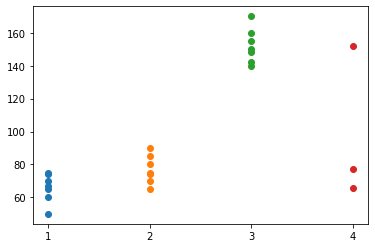

In [87]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

y1 = np.array([70, 50, 65, 60, 75, 67, 74])
y2 = np.array([80, 74, 90, 70, 75, 65, 85])
y3 = np.array([148, 142, 140, 150, 160, 170, 155])
y4= np.array([y_mean_1, y_mean_2, y_mean_3])

f, ax = plt.subplots()
for xe, ye in zip([1, 2, 3, 4], [y1, y2, y3, y4]):
    plt.scatter([xe] * len(ye), ye, label='xx')
plt.xticks([1, 2, 3, 4])

# Найдем значения критерия фишера для однофакторного дисперсионного анализа.
f = stats.f_oneway(y1, y2, y3)
f

In [4]:
k= 3
n = 21

F_н=(σ_ф^2)/(σ_ост^2 ), а величины σ_ф^2  и σ_ост^2  мы найдем из формул :
〖 σ〗_ф^2=  (S_ф^2)/(k-1), где k= 3 
 σ_ост^2=(S_ост^2)/(n-k), где n = 21 Это общее количество значений заработных плат во всех трех подгруппах.
S_ф^2=∑_(i=1)^k▒〖〖((y_i ) ̅-Y ̅)〗^2*n_i 〗
S_ост^2=∑_(i=1)^k▒∑_(j=1)^(n_i)▒〖〖〖(y〗_ij-(y_i ) ̅)〗^2  〗


In [5]:
y_mean_1 = np.mean(y1)
y_mean_1

65.85714285714286

In [6]:
y_mean_2 = np.mean(y2)
y_mean_2

77.0

In [7]:
y_mean_3 = np.mean(y3)
y_mean_3

152.14285714285714

In [12]:
total = np.array([y1, y2, y3 ])
total

array([[ 70,  50,  65,  60,  75,  67,  74],
       [ 80,  74,  90,  70,  75,  65,  85],
       [148, 142, 140, 150, 160, 170, 155]])

In [13]:
y_mena_total= np.mean(total)
y_mena_total

98.33333333333333

Сумма квадратов отклонений наблюдений от общего среднего

In [22]:
np.sum((total - 98.33)**2) # отложим это значение

32400.6669

Сумма квадратов отклонений средних групповых значений от общего среднего 

In [36]:
S_f = np.sum((y_mean_1 - 98.33)**2) * 7 + np.sum((y_mean_2 - 98.33)**2) * 7 + np.sum((y_mean_3 - 98.33)**2) * 7 # S_f
S_f

30836.952614285707

Остаточная сумма квадратов отклонений

In [38]:
S_ost = np.sum((y1-y_mean_1)**2) + np.sum((y2-y_mean_2)**2) + np.sum ((y3-y_mean_3)**2) # S_ost
S_ost

1563.7142857142858

In [35]:
30836.952614285707 + 1563.7142857142858

32400.666899999993

In [41]:
D_f = S_f / ( k - 1)
D_f

15418.476307142853

In [43]:
D_ost = S_ost / ( n - k)
D_ost

86.87301587301587

In [44]:
F_n = 15418.476307142853 / 86.87301587301587
F_n

177.48291747670376

In [ ]:
# 2 way

In [47]:

from statsmodels.stats.multicomp import pairwise_tukeyhsd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [60]:
import pandas as pd
df = pd.DataFrame({'score': [ 70,  50,  65,  60,  75,  67,  74,
                              80,  74,  90,  70,  75,  65,  85,
                             148, 142, 140, 150, 160, 170, 155],
                   'group': np.repeat(['accountant', 'lawyer', 'programmer'], repeats=7)}) 

In [61]:
tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0917 -1.5675 23.8532  False
accountant programmer  86.2857  0.001 73.5754  98.996   True
    lawyer programmer  75.1429  0.001 62.4325 87.8532   True
------------------------------------------------------------


In [64]:
# 2
import statsmodels.api as sm

In [66]:
from statsmodels.formula.api import ols

In [73]:
fA = np.array(["low", "low", "low", "low", "high", "high", "high", "high"])
fA

array(['low', 'low', 'low', 'low', 'high', 'high', 'high', 'high'],
      dtype='<U4')

In [79]:
fB = np.array(["low", "low", "high", "high", "low", "low", "high", "high"])
fB

array(['low', 'low', 'high', 'high', 'low', 'low', 'high', 'high'],
      dtype='<U4')

In [78]:
values = np.array([57, 59, 56, 58, 32, 34, 71, 71])
values
              

array([57, 59, 56, 58, 32, 34, 71, 71])

In [80]:
df=pd.DataFrame({'fA': fA, 'fB': fB, 'values': values})
df

,fA,fB,values
0,low,low,57
1,low,low,59
2,low,high,56
3,low,high,58
4,high,low,32
5,high,low,34
6,high,high,71
7,high,high,71


In [81]:
lm_model = ols('values ~ C(fA) * C (fB)', data = df).fit()


In [83]:
table = sm.stats.anova_lm (lm_model, typ=2)
table

,sum_sq,df,F,PR(>F)
C(fA),60.5,1.0,40.333333,0.003150
C(fB),684.5,1.0,456.333333,0.000028
C(fA):C(fB),760.5,1.0,507.000000,0.000023
Residual,6.0,4.0,NaN,NaN


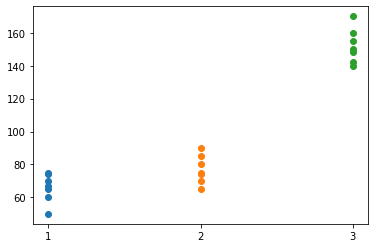

In [85]:
f, ax = plt.subplots()
for xe, ye in zip([1, 2, 3], [y1, y2, y3]):
    plt.scatter([xe] * len(ye), ye, label='xx')
plt.xticks([1, 2, 3])
plt.show()

In [88]:
y111= 57
y112 = 59
y11 = (y111 + y112)/2
y11

58.0

In [89]:
y121 = 56
y122 = 58
y12 = (y121 + y122)/2
y12

57.0

In [91]:
y211 = 32
y212 = 34
y21 = (y211 + y212)/2
y21

33.0

In [92]:
y221 = 71
y222 = 71
y22 = (y221 + y222)/2
y22

71.0

In [93]:
YcpA1 = (y11+y12)/2
YcpA1


57.5

In [94]:
YcpA2 = (y21+y22)/2
YcpA2


52.0

In [95]:
YcpB1 = (y11+y21)/2
YcpB1


45.5

In [96]:
YcpB2 = (y12+y22)/2
YcpB2

64.0

In [97]:
Ycp = np.mean( YcpA1 + YcpA2 + YcpB1 + YcpB2)/4
Ycp 

54.75

In [ ]:
a = 2 #  2 уровня фактора а
b = 2 # 2  уровня фактора b
n = k =2 # число повторных измерений

In [ ]:
# SSt= sum((yijk)**2)- a*b*n*(Ycp**2) = 57**2 + 59**2+ ... + 71**2 - 2*2*2*(54.75)**2 = 1511.5

In [ ]:
# SSA = a*n* sum ((YcpA)**2) - a*b*n* (Ycp)**2 = 2*2*((57.5)**2 + (52)**2) - 8* (54.75)**2 = 60.5

In [ ]:
# SSB = b*n* sum ((YcpB)**2) - a*b*n* (Ycp)**2 = 2*2* ((45.5)**2 + (64)**2) = 684.5

In [ ]:
# SSAB = n* ( sum((yij_cp)**2))- a*b*n* Ycp - SSa - SSB = 2* ((58)**2+ (57)**2 + (33)**2 + (71)**2 - 8*(54.75)**2 - 60.5 - 684.5 = 760.5

In [ ]:
SSE = SSt -SSA - SSB - SSAB = 1511.5 - 60.5 - 684.5 - 760.5 = 6

In [ ]:
dfA = 2-1 = 1 # (a - 1)

In [ ]:
dfB = 2-1 = 1 # ( b - 1)

In [ ]:
dfAB = (a - 1) * (b - 1)  = (2 -1) * (2 - 1) = 1

In [ ]:
dfE = a* b* (n - 1) = 2 *2* (2 - 1) = 4

In [ ]:
MSA =  SSA / dfA = 60.5 / 1 = 60.5

In [ ]:
MSB = SSB / dfB = 684.5 / 1 = 684.5

In [ ]:
MSAB = SSAB / dfAB = 760.5 / 1 = 760.5

In [ ]:
MSE = SSE / dfE = 6/4 = 1.5

In [ ]:
FA = MSA / MSE = 60.5 / 1.5 = 40.33

In [ ]:
FB = MSB / MSE = 684.5 / 1.5 = 456.33

In [ ]:
FAB = MSAB / MSE = 760.5 / 1.5 = 507

In [ ]:
F_t = 7.71